In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sms_spam = pd.read_csv('d:/sms_spam.csv')
sms_spam.columns.values[0]="Label"
sms_spam.columns.values[1]="Sms"
print(sms_spam.shape)
sms_spam.head()

(5574, 2)


,Label,Sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


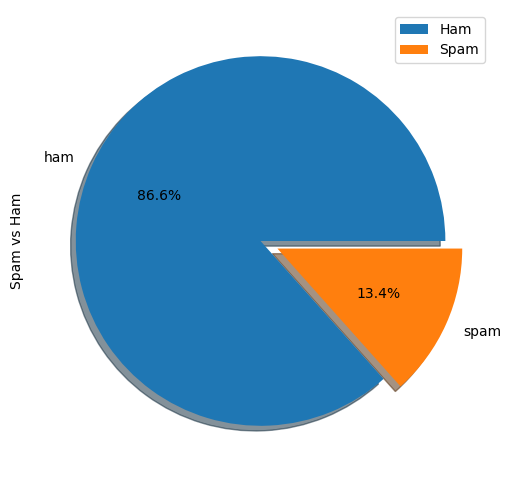

In [236]:

sms_spam["Label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [238]:
sms_spam['Label'].value_counts(normalize=True)

ham     0.865985
spam    0.134015
Name: Label, dtype: float64

In [239]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)


In [240]:
# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

In [241]:
# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

In [242]:
print(training_set.shape)
print(test_set.shape)

(4459, 2)
(1115, 2)


In [244]:
training_set['Label'].value_counts(normalize=True)

ham     0.865216
spam    0.134784
Name: Label, dtype: float64

In [245]:
test_set['Label'].value_counts(normalize=True)

ham     0.869058
spam    0.130942
Name: Label, dtype: float64

In [246]:
# Before cleaning
training_set.head(3)

,Label,Sms
0,ham,Looks like u wil b getting a headstart im leav...
1,ham,"I noe la... U wana pei bf oso rite... K lor, o..."
2,ham,2mro i am not coming to gym machan. Goodnight.


In [247]:
##Data clensing
training_set['Sms'] = training_set['Sms'].str.replace(r'\W', ' ') # Removes punctuation
training_set['Sms'] = training_set['Sms'].str.lower()
training_set.head(3)

C:\Users\LAKSHMI\AppData\Local\Temp\ipykernel_16788\1602854740.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  training_set['Sms'] = training_set['Sms'].str.replace(r'\W', ' ') # Removes punctuation


,Label,Sms
0,ham,looks like u wil b getting a headstart im leav...
1,ham,i noe la u wana pei bf oso rite k lor o...
2,ham,2mro i am not coming to gym machan goodnight


In [193]:
'''
create the vocabulary
We transform each message in thetext column into a list by splitting the string at the space character — we're using the Series.str.split() method.
We initiate an empty list named vocabulary.
We iterate over the transformed text column.
Using a nested loop, we iterate over each message in the text column and append each string (word) to the vocabulary list.
We transform the vocabulary list into a set using the set() function. This will remove the duplicates from the vocabulary list.
We transform the vocabulary set back into a list using the list() function.
'''

"\ncreate the vocabulary\nWe transform each message in thetext column into a list by splitting the string at the space character — we're using the Series.str.split() method.\nWe initiate an empty list named vocabulary.\nWe iterate over the transformed text column.\nUsing a nested loop, we iterate over each message in the text column and append each string (word) to the vocabulary list.\nWe transform the vocabulary list into a set using the set() function. This will remove the duplicates from the vocabulary list.\nWe transform the vocabulary set back into a list using the list() function.\n"

In [248]:

training_set['Sms'] = training_set['Sms'].str.split()

vocabulary = []
for Sms in training_set['Sms']:
   for word in Sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

In [249]:
len(vocabulary)

7802

In [250]:
vocabulary

['baller',
 'outside',
 'refund',
 'sha',
 '910',
 'now',
 'coat',
 'plate',
 'trav',
 'poboxox36504w45wq',
 'sleepingwith',
 'miss',
 '3optical',
 'admirer',
 'farting',
 'disk',
 'pours',
 'sickness',
 'stopped',
 'ending',
 'maybe',
 'uawake',
 'december',
 'woozles',
 'missing',
 'def',
 'rebooting',
 'mobiles',
 'beggar',
 'urfeeling',
 'wld',
 'qing',
 'money',
 '515',
 'birth',
 'honeybee',
 'csc',
 'huai',
 'rushing',
 'icmb3cktz8r7',
 'oredi',
 'february',
 '1843',
 'garments',
 'terminated',
 'r',
 'moved',
 '7oz',
 'soul',
 'compulsory',
 'rimac',
 '61200',
 'envelope',
 'captain',
 'dependents',
 'railway',
 'study',
 'share',
 'nipost',
 'bold',
 '05',
 'elaborating',
 'personal',
 'profile',
 'audiitions',
 'meeting',
 'tiz',
 '2mro',
 'imat',
 'barrel',
 'iam',
 'quiet',
 'palm',
 'hourish',
 'kolathupalayam',
 '07xxxxxxxxx',
 'ooooooh',
 'want2come',
 'predict',
 'bc',
 'vodka',
 'tolerance',
 'awaiting',
 'sheffield',
 '83049',
 '4th',
 'halla',
 'the4th',
 'bend',
 'w

In [251]:
word_counts_per_text = {'secret': [2,1,1],
                       'prize': [2,0,1],
                       'claim': [1,0,1],
                       'now': [1,0,1],
                       'coming': [0,1,0],
                       'to': [0,1,0],
                       'my': [0,1,0],
                       'party': [0,1,0],
                       'winner': [0,0,1]
                      }


In [252]:
word_counts_per_text

{'secret': [2, 1, 1],
 'prize': [2, 0, 1],
 'claim': [1, 0, 1],
 'now': [1, 0, 1],
 'coming': [0, 1, 0],
 'to': [0, 1, 0],
 'my': [0, 1, 0],
 'party': [0, 1, 0],
 'winner': [0, 0, 1]}

In [253]:
word_counts = pd.DataFrame(word_counts_per_text)
word_counts.head()

,secret,prize,claim,now,coming,to,my,party,winner
0,2,2,1,1,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0
2,1,1,1,1,0,0,0,0,1


In [254]:
'''
To create the dictionary we need for our training set

We start by initializing a dictionary named word_counts_per_text, where each key is a
unique word (a string) from the vocabulary, and each value is a list of the length of the training set, 
where each element in that list is a 0.
The code [0] * 5 outputs [0, 0, 0, 0, 0]. So the code [0] * len(training_set['text']) outputs a list of the 
length of training_set['text'].
We loop over training_set['text'] using the enumerate() function to get both the index and the text message (index and text).
Using a nested loop, we loop over text (where text is a list of strings, where each string represents a word in a message).
We increment word_counts_per_text[word][index] by 1.

word_counts_per_text = {unique_word: [0] * len(training_set['text']) for unique_word in vocabulary}
'''

"\nTo create the dictionary we need for our training set\n\nWe start by initializing a dictionary named word_counts_per_text, where each key is a\nunique word (a string) from the vocabulary, and each value is a list of the length of the training set, \nwhere each element in that list is a 0.\nThe code [0] * 5 outputs [0, 0, 0, 0, 0]. So the code [0] * len(training_set['text']) outputs a list of the \nlength of training_set['text'].\nWe loop over training_set['text'] using the enumerate() function to get both the index and the text message (index and text).\nUsing a nested loop, we loop over text (where text is a list of strings, where each string represents a word in a message).\nWe increment word_counts_per_text[word][index] by 1.\n\nword_counts_per_text = {unique_word: [0] * len(training_set['text']) for unique_word in vocabulary}\n"

In [257]:
word_counts_per_sms = {unique_word: [0] * len(training_set['Sms']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['Sms']):
   for word in sms:
      word_counts_per_sms[word][index] += 1

In [258]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,baller,outside,refund,sha,910,now,coat,plate,trav,poboxox36504w45wq,...,relieved,tom,loxahatchee,69866,living,affectionate,dryer,dint,piss,sos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()
#training_set_clean.columns.values[0] = "Label"

,Label,Sms,baller,outside,refund,sha,910,now,coat,plate,...,relieved,tom,loxahatchee,69866,living,affectionate,dryer,dint,piss,sos
0,ham,"[looks, like, u, wil, b, getting, a, headstart...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,"[todays, vodafone, numbers, ending, with, 4882...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[hi, hope, ur, day, good, back, from, walk, ta...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
'''
spam_messages = []
ham_messages = []
for row in training_set_clean.values:
    if row[0] == 'ham':
        ham_messages.append(row)
    else:
        spam_messages.append(row)
spam_messages
'''

"\nspam_messages = []\nham_messages = []\nfor row in training_set_clean.values:\n    if row[0] == 'ham':\n        ham_messages.append(row)\n    else:\n        spam_messages.append(row)\nspam_messages\n"

In [262]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['Sms'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['Sms'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

In [263]:
n_spam

15239

In [265]:
n_ham

57367

In [266]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

In [ ]:
'''
Let's start by writing a first version of this function. For the classify() function below, notice that:

The input variable message needs to be a string.
We perform a bit of data cleaning on the string message:
We remove the punctuation using the re.sub() function.
We bring all letters to lower case using the str.lower() method.
We split the string at the space character and transform it into a Python list using the str.split() method.
We calculate p_spam_given_message and p_ham_given_message.
We compare p_spam_given_message with p_ham_given_message and then print a classification label.
'''

In [267]:
import re

def classify(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham: 
         p_ham_given_message *= parameters_ham[word]

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')
   else:
      print('Equal proabilities, have a human classify this!')

In [268]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3223124637479498e-25
P(Ham|message): 1.9256070327302398e-27
Label: Spam


In [269]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.9924074636145265e-25
P(Ham|message): 3.6028697692196735e-21
Label: Ham


In [270]:
def classify_test_set(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham:
         p_ham_given_message *= parameters_ham[word]

   if p_ham_given_message > p_spam_given_message:
      return 'ham'
   elif p_spam_given_message > p_ham_given_message:
      return 'spam'
   else:
      return 'needs human classification'

In [272]:
test_set['predicted'] = test_set['Sms'].apply(classify_test_set)
test_set.head()

,Label,Sms,predicted
0,ham,Wherre's my boytoy ? :-(,ham
1,ham,Later i guess. I needa do mcat study too.,ham
2,ham,But i haf enuff space got like 4 mb...,ham
3,spam,Had your mobile 10 mths? Update to latest Oran...,spam
4,ham,All sounds good. Fingers . Makes it difficult ...,ham


In [274]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
   row = row[1]
   if row['Label'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1103
Incorrect: 12
Accuracy: 0.989237668161435
